# Simple Embedded Diagrams

A wide variety of packages exist that support the creation of diagrams from written descriptions. Some of this operate at a low representation level, such as drawings defined using the LaTeX TikZ package, or the Graphviz dot language.

This notebook demonstrates a family of packages that can be used to generate a range of diagram types from simple representation languages defined to work with the packages.

Typically, we would preinstall these packages into a custom environment to be used by module team members, students, or researchers so that they could be used directly and without any further installation requirements.

In [ ]:
#Scale SVG embeds
from IPython.display import HTML
style = "<style>svg{width:50% !important;height:50% !important;}</style>"
HTML(style)

## `blockdiag` Family of figures

Render the `blockdiag` family of figures using cell magic and figure descriptions written in a code cell.

*The following cell may take some time to run as it installs the `blockdiag` package and IPython magic.*

In [2]:
%%capture
try:
    %load_ext blockdiag_magic
    #You only need to run this cell once per Azure Notebooks session
except:
    !pip install blockdiag
    !pip install git+https://github.com/innovationOUtside/ipython_magic_blockdiag.git
        
    %load_ext blockdiag_magic

*If you get an error after installing the packages when you try to run the `%%blockdiag` cell, restart the notebook kernel from the Kernel menu and then run the following cells again. You should not need to run the "install" cell above again.*

It would be handy if there was a `-s / --size` flag just to limit the size of the displayed image.

In [18]:
#%load_ext blockdiag_magic
#For inline png - lower quality image if inkscape not available
#%setdiagpng magic 

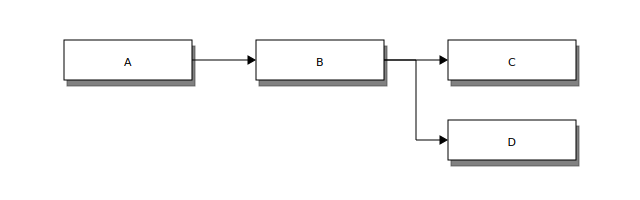

In [3]:
%%blockdiag
    {
       A -> B -> C;
            B -> D;
    }

As well as block diagrams, several other diagram types are supported. For example, *sequence diagrams*:

In [4]:
%%capture
!pip install seqdiag

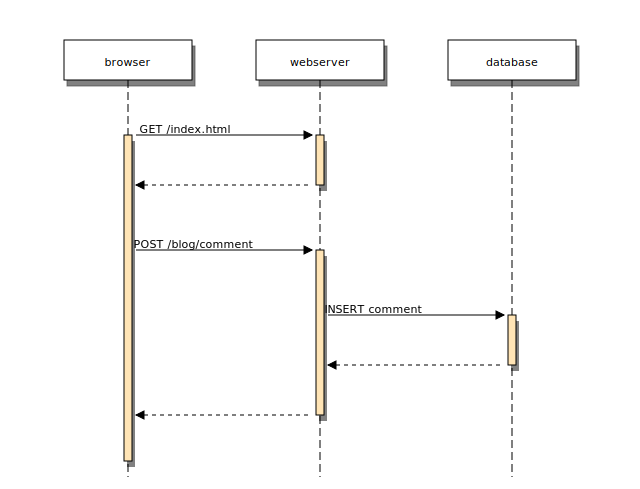

In [5]:
%%seqdiag 
{
  browser  -> webserver [label = "GET /index.html"];
  browser <-- webserver;
  browser  -> webserver [label = "POST /blog/comment"];
              webserver  -> database [label = "INSERT comment"];
              webserver <-- database;
  browser <-- webserver;
}


Or *activity diagrams*:

In [6]:
%%capture
!pip install actdiag

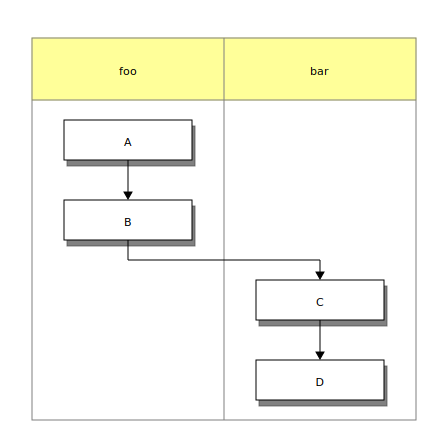

In [7]:
%%actdiag 
{
   A -> B -> C -> D;

  lane foo {
    A; B;
  }
  lane bar {
    C; D;
  }
}

Or communication *network diagrams*:

In [8]:
%%capture
!pip install nwdiag

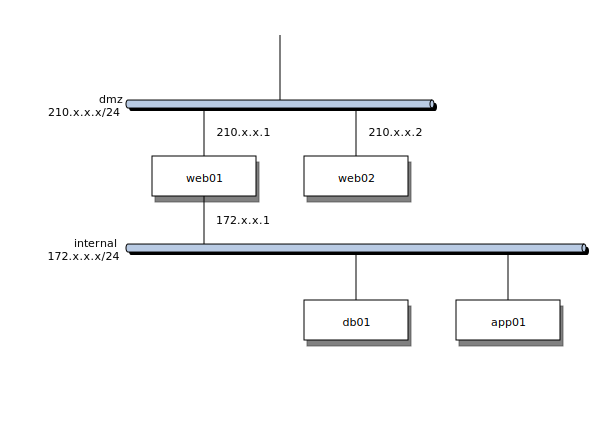

In [9]:
%%nwdiag
{
  network dmz {
      address = "210.x.x.x/24"

      web01 [address = "210.x.x.1"];
      web02 [address = "210.x.x.2"];
  }
  network internal {
      address = "172.x.x.x/24";

      web01 [address = "172.x.x.1"];
      db01;
      app01;
  }
}

Or *rack diagrams*:

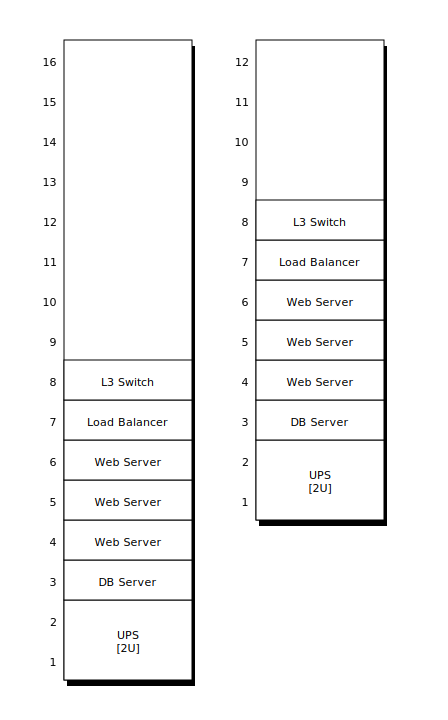

In [13]:
%%rackdiag
{
  // define 1st rack
  rack {
    16U;

    // define rack items
    1: UPS [2U];
    3: DB Server
    4: Web Server
    5: Web Server
    6: Web Server
    7: Load Balancer
    8: L3 Switch
  }

  // define 2nd rack
  rack {
    12U;

    // define rack items
    1: UPS [2U];
    3: DB Server
    4: Web Server
    5: Web Server
    6: Web Server
    7: Load Balancer
    8: L3 Switch
  }
}

## `tikz`

`tikz` is a powerful *TeX* drawing package. See the notebook `3.2.0 Generating Embedded Diagrams.ipynb` for examples of various scientific diagrams that can be produced with this package.

In [1]:
%%capture
#Try to load in the magic - if we can't, check everything we need is installed and try again
try:
    %load_ext tikz_magic
except:
    !conda config --add channels conda-forge
    !conda install -y imagemagick
    !pip install --user git+https://github.com/innovationOUtside/ipython_magic_tikz
    %load_ext tikz_magic

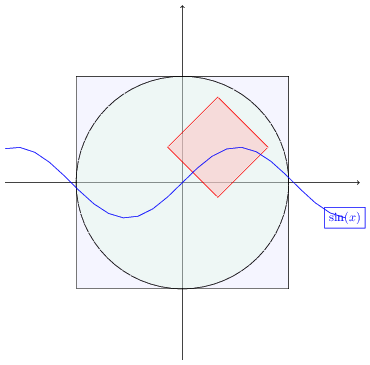

In [7]:
%%tikz  -s 0.3
\draw[->](-5,0) -- (5,0); 
\draw[->](0,-5) -- (0,5); 


\draw[fill=blue!15,fill opacity=.25]  (-3,-3) rectangle (3,3);
\draw[fill=green!15,fill opacity=.25] circle [radius=3cm]; 
\draw[red,shift={(1,1)},rotate=45,fill=red!25,fill opacity=.5] %
          (1,1) -- (1,-1) -- (-1,-1) -- (-1,1) -- (1,1);
\draw[color=blue] plot (\x,{sin(\x r)}) node [draw] {$\sin(x)$} ;     


The [tikz-penciline](https://github.com/renard/tikz-penciline) package (inspired by [this StackExchange answer?](https://tex.stackexchange.com/a/49961/151162); other XKCD-like styles available from that question) will do hand-drawn / sketch (almost XKCD) style drawings, but how do we install it in Azure notebooks?

I've put a modified version of the file that can be loaded as a tex file in `./resources`, with usage as follows:

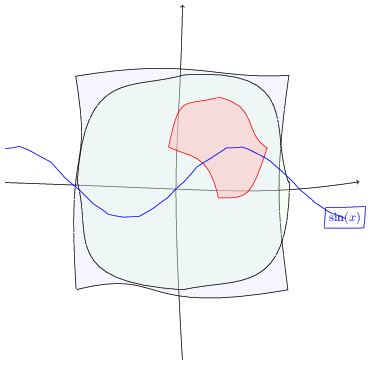

In [11]:
%%tikz --no-wrap -p ifthen,pgfplots -s 0.3
%Note that we need to import the ifthen,pgfplotspackages, and \input the modified tex file
\input{"resources/penciline-tikz.tex"}

\begin{tikzpicture}[penciline={jag ratio=10}]
\draw[penciline={jag ratio=5},->](-5,0) -- (5,0); 
\draw[penciline={jag ratio=5},->](0,-5) -- (0,5); 

\draw[decorate,fill=blue!15,fill opacity=.25]  (-3,-3) rectangle (3,3);
\draw[penciline={jag ratio=0},fill=green!15,fill opacity=.25] circle [radius=3cm]; 
\draw[decorate,red,shift={(1,1)},rotate=45,fill=red!25,fill opacity=.5] %
          (1,1) -- (1,-1) -- (-1,-1) -- (-1,1) -- (1,1);
\draw[penciline={jag ratio=0.1},color=blue]   plot (\x,{sin(\x r)}) node [decorate,draw] {$\sin(x)$} ;     
\end{tikzpicture}